# BCG X - GFC - 10-K Analysis (MSFT, APPL, TSLA)
## Andrew J Forbes

GFC’s approach to financial analysis needs to evolve. Traditional methods, while reliable, are proving too slow and resource-intensive in an environment where capital deployment, profitability, and liquidity must be assessed in real time. The competitive landscape demands an AI-driven solution capable of synthesizing financial data at scale, identifying trends, and unlocking insights that drive strategic decision-making.  

### Summary

Looking at the past three years, Microsoft has positioned itself as the strongest performer, effectively translating its investments in AI, cloud computing, and enterprise software into accelerated growth. Revenue has rebounded from 6.9% in 2023 to 15.7% in 2024, while net income reversed from a 5% decline to a 21.8% increase. This signals robust pricing power and operational efficiency. However, a corresponding increase in liabilities—from 3.8% to 18.4%—suggests an aggressive growth strategy, likely tied to infrastructure expansion and M&A. The challenge will be ensuring that this leverage continues to generate sustained returns without compromising financial flexibility.  

Apple presents a different playbook—one of measured, deliberate stability. Revenue contracted by 2.8% in 2023 before recovering to 2.0% growth in 2024, effectively resetting to 2022 levels. While less aggressive than Microsoft, Apple’s approach has preserved profitability, with a consistent net income trajectory and controlled asset growth. A conservative capital structure suggests a focus on efficiency rather than expansion, likely prioritizing incremental innovation and ecosystem monetization. While this approach mitigates downside risk, it could also limit upside potential in high-growth areas such as AI and cloud services.  

Tesla, however, faces structural headwinds. Revenue growth has stalled, falling from 18.8% in 2023 to just 0.9% in 2024, while net income has collapsed from a 19% gain to a 52% decline. This reflects increasing margin pressures, potential demand constraints, and heightened competition in the EV market. Asset turnover and return metrics are deteriorating, suggesting that Tesla’s current model is becoming less capital-efficient. Liquidity remains stable, but unless the company realigns its cost structure or identifies new revenue levers, it risks ceding competitive ground.  

From a macro perspective, the financial data reinforces a clear insight: sustained value creation requires a balance of growth, efficiency, and financial discipline. Microsoft is executing a high-growth, high-investment strategy that demands careful capital allocation. Apple is leveraging stability and operational excellence but may need to recalibrate for future growth. Tesla, facing profitability compression, must adapt its model to restore financial momentum. AI-driven financial analytics will be critical in enabling firms to anticipate these shifts, model strategic outcomes, and optimize decision-making in an increasingly dynamic market.



In [ ]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import data
df = pd.read_csv('data/BCG X - Fiscal AI Chatbot - FirmFinancials222324.csv').sort_values(['firm','year']).reset_index(drop=True)

# Adjust Data to be Floats
columns_to_convert = ["Total Revenue", "Net Income", "Total Assets", "Total Liabilities",
                      "Cash Generated"]

for col in columns_to_convert:
    df[col] = df[col].replace({',': ''}, regex=True).astype(float)

df

,firm,year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Generated
0,Apple,2022,3.943280e+11,9.980300e+10,3.527550e+11,3.020830e+11,1.221510e+11
1,Apple,2023,3.832850e+11,9.699500e+10,3.525830e+11,2.904370e+11,1.105430e+11
2,Apple,2024,3.910350e+11,9.373600e+10,3.649800e+11,3.080300e+11,1.182540e+11
3,Microsoft,2022,1.982700e+11,7.273800e+10,3.648400e+11,1.982980e+11,8.903500e+10
4,Microsoft,2023,2.119150e+11,7.236100e+10,4.119760e+11,2.057530e+11,8.758200e+10
5,Microsoft,2024,2.451220e+11,8.813600e+10,5.121630e+11,2.436860e+11,1.185480e+11
6,Tesla,2022,8.146200e+10,1.258700e+10,8.233800e+10,3.644000e+10,1.472400e+10
7,Tesla,2023,9.677300e+10,1.497400e+10,1.066180e+11,4.300900e+10,1.325600e+10
8,Tesla,2024,9.769000e+10,7.153000e+09,1.220700e+11,4.839000e+10,1.492300e+10


In [ ]:
# YoY Changes
df['Revenue Growth (%)'] = df.groupby(['firm'])['Total Revenue'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby(['firm'])['Net Income'].pct_change() * 100
df['Asset Growth (%)'] = df.groupby(['firm'])['Total Assets'].pct_change() * 100
df['Liability Growth (%)'] = df.groupby(['firm'])['Total Liabilities'].pct_change() * 100
df['Cash From Operations Growth (%)'] = df.groupby(['firm'])['Cash Generated'].pct_change() * 100

# Profitability Analysis
df['Gross Profit Margin'] = df['Net Income'] / df['Total Revenue']
df['ROA'] = df['Net Income'] / df['Total Assets']
df['ROE'] = df['Net Income'] / (df['Total Assets'] - df['Total Liabilities'])

# Liquidity & Solvency Analysis
df['Current Ratio'] = df['Total Assets'] / df['Total Liabilities']
df['Debt-to-Assets Ratio'] = df['Total Liabilities'] / df['Total Assets']
df['Operating CF to Debt'] = df['Cash Generated'] / df['Total Liabilities']

# Efficiency Analysis
df['Asset Turnover Ratio'] = df['Total Revenue'] / df['Total Assets']
df['Cash Conversion Efficiency'] = df['Cash Generated'] / df['Net Income']

df


,firm,year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Generated,Revenue Growth (%),Net Income Growth (%),Asset Growth (%),Liability Growth (%),Cash From Operations Growth (%),Gross Profit Margin,ROA,ROE,Current Ratio,Debt-to-Assets Ratio,Operating CF to Debt,Asset Turnover Ratio,Cash Conversion Efficiency
0,Apple,2022,3.943280e+11,9.980300e+10,3.527550e+11,3.020830e+11,1.221510e+11,NaN,NaN,NaN,NaN,NaN,0.253096,0.282924,1.969589,1.167742,0.856354,0.404362,1.117852,1.223921
1,Apple,2023,3.832850e+11,9.699500e+10,3.525830e+11,2.904370e+11,1.105430e+11,-2.800461,-2.813543,-0.048759,-3.855232,-9.502992,0.253062,0.275098,1.560760,1.213974,0.823741,0.380609,1.087077,1.139677
2,Apple,2024,3.910350e+11,9.373600e+10,3.649800e+11,3.080300e+11,1.182540e+11,2.021994,-3.359967,3.516052,6.057424,6.975566,0.239713,0.256825,1.645935,1.184885,0.843964,0.383904,1.071387,1.261564
3,Microsoft,2022,1.982700e+11,7.273800e+10,3.648400e+11,1.982980e+11,8.903500e+10,NaN,NaN,NaN,NaN,NaN,0.366863,0.199370,0.436755,1.839857,0.543520,0.448996,0.543444,1.224051
4,Microsoft,2023,2.119150e+11,7.236100e+10,4.119760e+11,2.057530e+11,8.758200e+10,6.882030,-0.518299,12.919636,3.759493,-1.631942,0.341462,0.175644,0.350887,2.002284,0.499430,0.425666,0.514387,1.210348
5,Microsoft,2024,2.451220e+11,8.813600e+10,5.121630e+11,2.436860e+11,1.185480e+11,15.669962,21.800417,24.318650,18.436183,35.356580,0.359560,0.172086,0.328281,2.101733,0.475798,0.486479,0.478602,1.345058
6,Tesla,2022,8.146200e+10,1.258700e+10,8.233800e+10,3.644000e+10,1.472400e+10,NaN,NaN,NaN,NaN,NaN,0.154514,0.152870,0.274239,2.259550,0.442566,0.404061,0.989361,1.169778
7,Tesla,2023,9.677300e+10,1.497400e+10,1.066180e+11,4.300900e+10,1.325600e+10,18.795267,18.964010,29.488207,18.026894,-9.970117,0.154733,0.140445,0.235407,2.478970,0.403393,0.308215,0.907661,0.885268
8,Tesla,2024,9.769000e+10,7.153000e+09,1.220700e+11,4.839000e+10,1.492300e+10,0.947578,-52.230533,14.492862,12.511335,12.575438,0.073221,0.058598,0.097082,2.522629,0.396412,0.308390,0.800279,2.086258


In [ ]:
# Set BCG-style plot aesthetics, adjust palettes manually depending on data
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12, 'axes.titlesize': 14, 'axes.labelsize': 12})

In [ ]:
# Plotting YoY Changes Function (Colors should be distinct here)
def plot_yoy_changes(df, metric, title, palette='Set1'):

    # Plot
    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(data=df, x='year', y=metric, hue='firm', marker='o', palette=palette)

    # Label
    plt.title(title, fontsize=16, weight='bold', pad=20, color='#1B4D3E')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel(f'{metric} (%)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    for line in ax.lines:
        for x, y in zip(line.get_xdata(), line.get_ydata()):
            if not pd.isna(y):
                plt.text(x, y + .3, f'{y:.1f}%', ha='center', va='bottom', fontsize=10, color=line.get_color())
    plt.legend(title='Firm', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, frameon=True)

    # Show
    plt.tight_layout()
    plt.show()


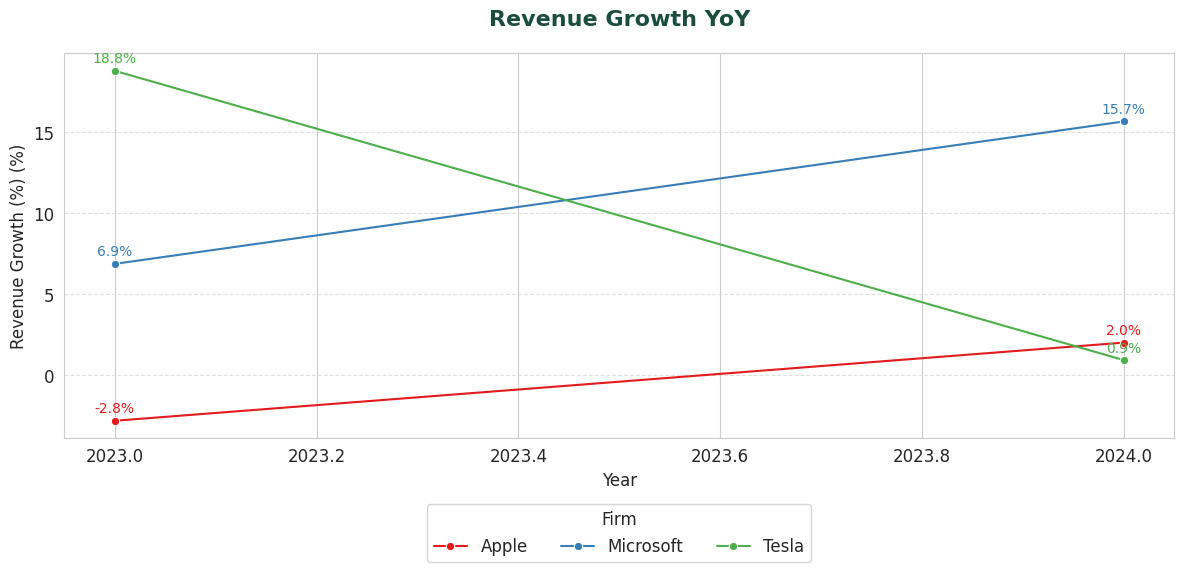

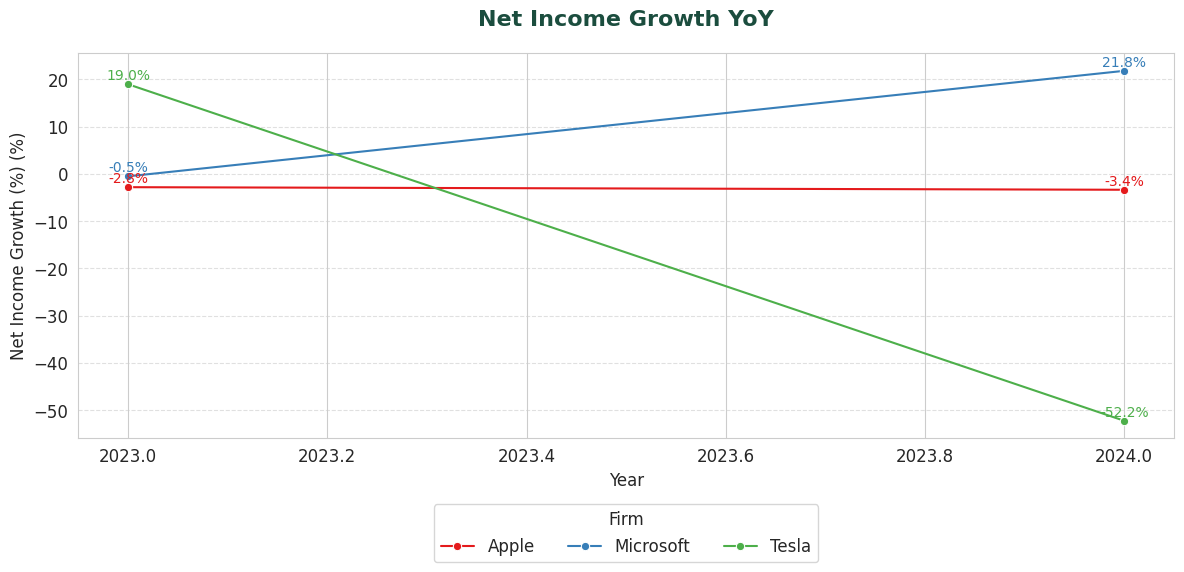

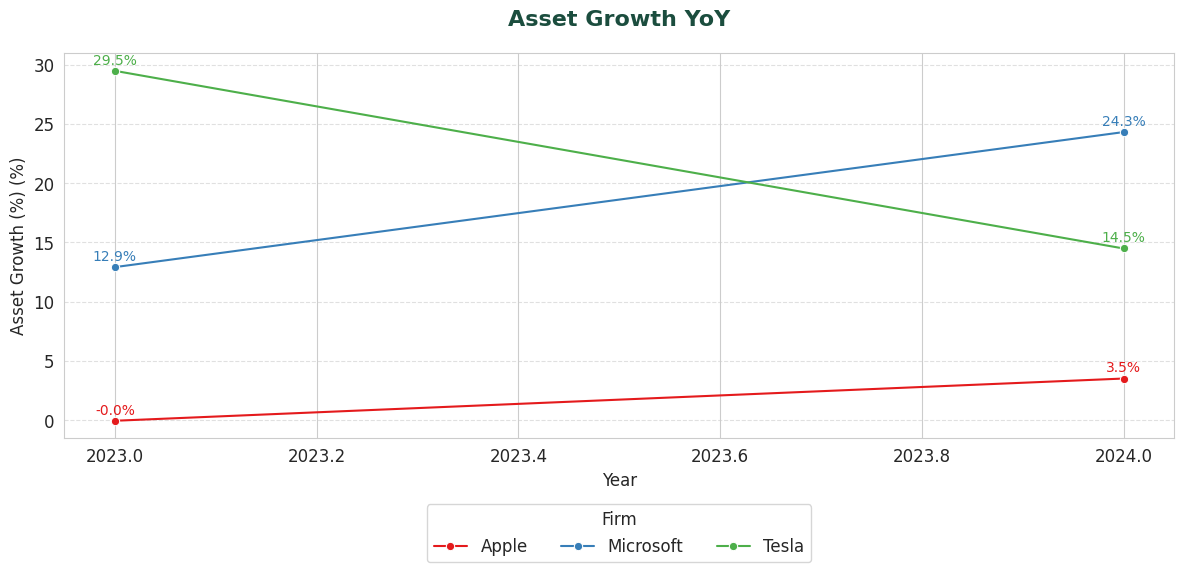

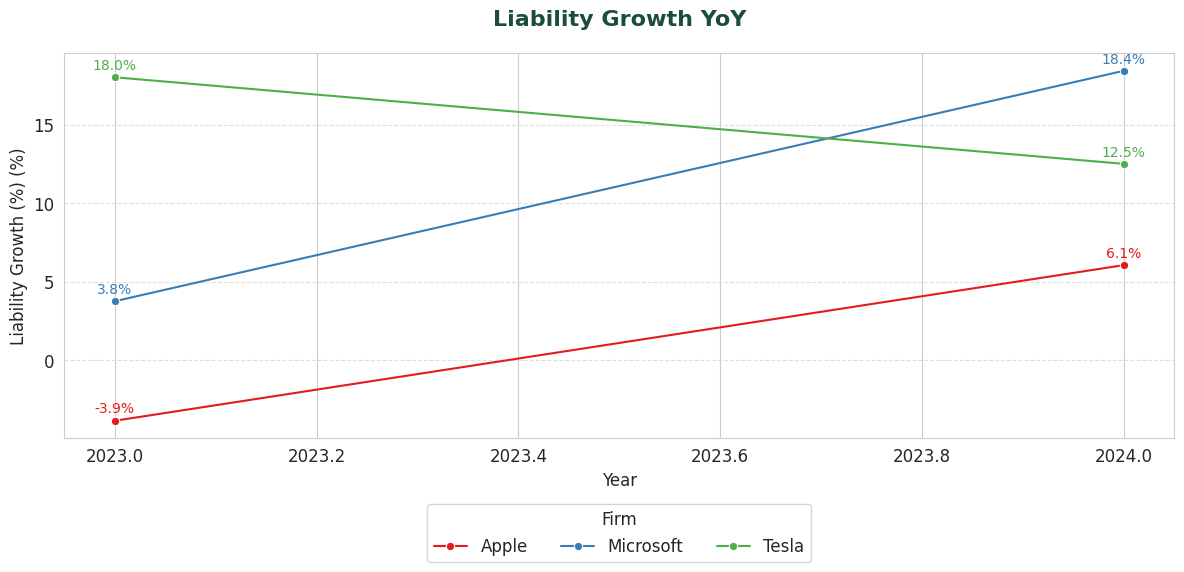

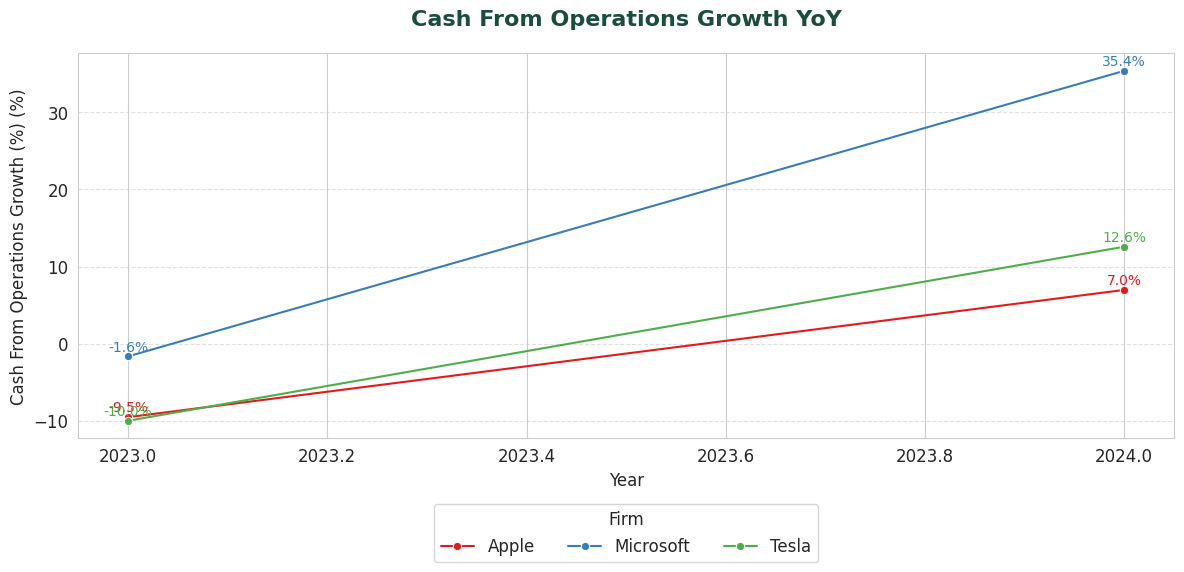

In [ ]:
# Plot YoY changes
plot_yoy_changes(df, 'Revenue Growth (%)', 'Revenue Growth YoY')
plot_yoy_changes(df, 'Net Income Growth (%)', 'Net Income Growth YoY')
plot_yoy_changes(df, 'Asset Growth (%)', 'Asset Growth YoY')
plot_yoy_changes(df, 'Liability Growth (%)', 'Liability Growth YoY')
plot_yoy_changes(df, 'Cash From Operations Growth (%)', 'Cash From Operations Growth YoY')

### Analysis

Microsoft has emerged as the clear leader in financial performance, demonstrating impressive revenue growth from 6.9% in 2023 to 15.7% in 2024, alongside a significant net income rebound from -5% to 21.8%. This signals strong execution in high-margin segments like cloud computing, AI, and enterprise software, allowing Microsoft to expand its asset base at an accelerating rate while still generating strong operational cash flow. However, its liability growth from 3.8% to 18.4% suggests aggressive investment, likely financing expansion in AI infrastructure, M&A activity, and data center capacity. While this high-growth strategy is paying off, Microsoft’s ability to manage debt and maintain profitability at scale will be critical moving forward.

Apple’s trajectory is one of measured stability. After a challenging 2023 with revenue declining by 2.8%, it has returned to modest 2.0% growth in 2024, effectively bringing its revenue back to 2022 levels. Net income has remained steady, indicating strong cost controls and pricing power, while asset growth, after being stagnant in 2023, saw a slight 4% uptick in 2024. Apple’s conservative approach to liabilities, compared to Microsoft’s expansion, suggests a more measured capital allocation strategy, likely focusing on incremental innovation in AI, hardware, and services. While this approach maintains stability, it may limit upside potential compared to Microsoft’s more aggressive bets.

Tesla, on the other hand, is at an inflection point. The company’s revenue growth has essentially stalled, collapsing from 18.8% in 2023 to just 0.9% in 2024, while net income has plummeted from a 19% gain to a staggering -52%. This sharp decline suggests significant margin compression, cost inefficiencies, and potential demand constraints. With slowing asset growth and a weaker financial position, Tesla’s current strategy appears increasingly vulnerable, potentially due to price cuts, competitive pressures in the EV market, or supply chain challenges. While all three companies saw downturns in cash from operations in 2023, Microsoft’s 35.4% rebound in 2024 underscores its ability to generate sustainable cash flow, while Apple and Tesla’s recoveries were less pronounced.

Overall, Microsoft’s bold investment strategy is driving significant returns, but its rising liabilities should be monitored. Apple remains a stable performer, though its conservative approach may limit high-growth opportunities. Tesla, however, faces the most pressing challenges, requiring a strategic pivot to regain profitability and sustain long-term growth in an increasingly competitive landscape.

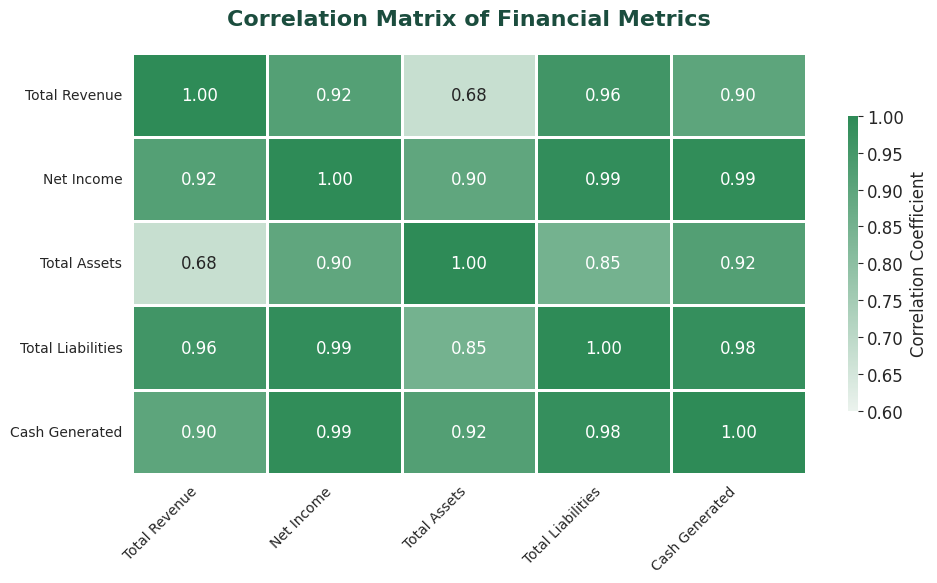

In [ ]:
# Correlation Matrix
columns = ['Total Revenue', 'Net Income', 'Total Assets', 'Total Liabilities', 'Cash Generated']
correlation_matrix = df[columns].corr()

# Plot
plt.figure(figsize=(10, 6))
ax = sns.heatmap(correlation_matrix,
                 annot=True,
                 fmt=".2f",
                 cmap= sns.light_palette("seagreen", as_cmap=True),
                 vmin=0.6, vmax=1,  # Adjusted range based on data, it's very positive :)
                 linewidths=1,
                 linecolor='white',
                 cbar_kws={'shrink': 0.7, 'aspect': 30, 'label': 'Correlation Coefficient'})

# Label
plt.title("Correlation Matrix of Financial Metrics", fontsize=16, weight='bold', color='#1B4D3E', pad=20)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show
plt.tight_layout()
plt.show()


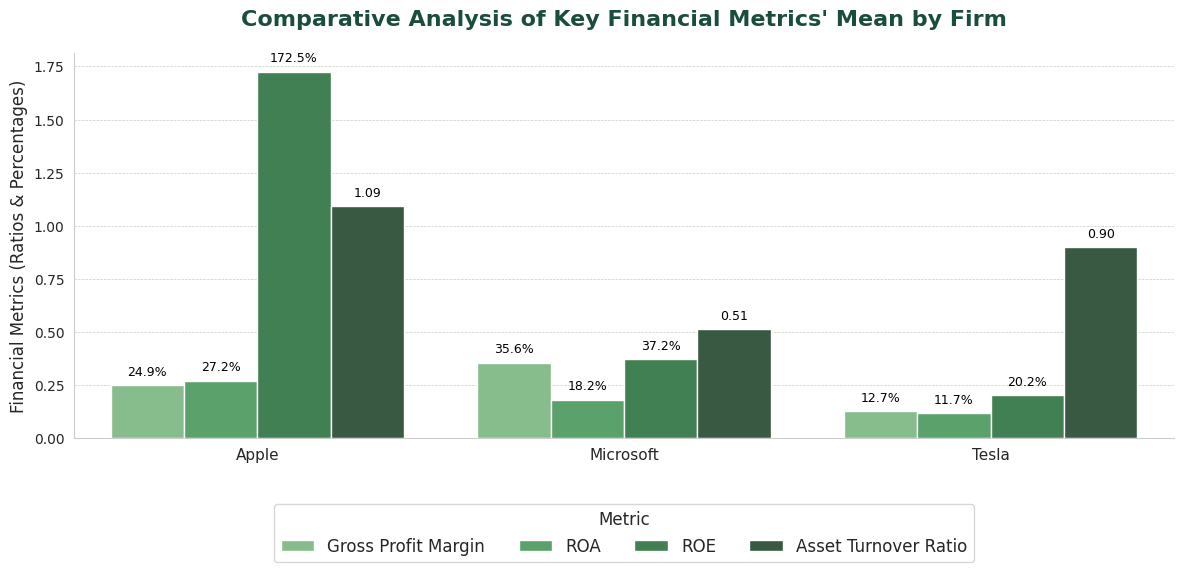

In [ ]:
# Mean Comparisons
comparative = df.groupby('firm')[['Gross Profit Margin', 'ROA', 'ROE', 'Asset Turnover Ratio']].mean().reset_index()

# Melt for barplot ease
comparative_melted = comparative.melt(id_vars='firm', var_name='Metric', value_name='Value')

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=comparative_melted,
                 x='firm', y='Value', hue='Metric',
                 palette=sns.color_palette('Greens_d', n_colors=4))

# Label
plt.title("Comparative Analysis of Key Financial Metrics' Mean by Firm", fontsize=16, weight='bold', pad=20, color='#1B4D3E')
plt.xlabel('')
plt.ylabel('Financial Metrics (Ratios & Percentages)', fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=10)

# Value Labels
for p, metric in zip(ax.patches, comparative_melted['Metric']):
    height = p.get_height()
    if height > 0:
        if metric in ['Gross Profit Margin', 'ROA', 'ROE']:
            label = f'{height:.1%}'
        else:
            label = f'{height:.2f}'
        ax.annotate(label, (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Look
plt.legend(title='Metric', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, frameon=True)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7, color='#A9BFA5')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show
plt.tight_layout()
plt.show()

### Analysis

#### Correlation Heatmap

The high correlation across total revenue, net income, total assets, total liabilities, and cash generation (all at 0.9 or higher) indicates a tightly interconnected financial structure, where growth in one area typically translates into proportional gains across the others. The slightly lower correlations for total assets and total liabilities at 0.85 suggest some variability in how these firms leverage their balance sheets, while the significantly lower correlation between total assets and total revenue at 0.68 implies that asset growth does not always translate into immediate revenue expansion, potentially due to capital-intensive investments or differences in business models.

#### Key Finances' Means

Overall, Microsoft dominates in profitability and margin efficiency, Apple leads in capital efficiency and returns to shareholders, while Tesla, despite its growth potential, faces challenges in profitability and capital deployment efficiency.

When comparing key financial ratios, Microsoft stands out with the highest gross profit margin at 35.6%, well above Apple’s 24.9% and Tesla’s 12.7%. This suggests superior pricing power and cost efficiency, particularly in its software and cloud segments. Apple, while lower than Microsoft, still maintains a strong margin, reflecting its premium pricing strategy and high-margin services business. Tesla, at 12.7%, lags considerably due to its capital-intensive manufacturing model and competitive pricing pressures in the EV space.

Return on Assets (ROA) presents an interesting contrast, with Apple leading at 27.2%, followed by Microsoft at 18.2% and Tesla at 11.7%. This suggests Apple is the most efficient in converting assets into profit, likely due to its lean supply chain and high-margin services. Microsoft’s lower ROA reflects its heavy investment in infrastructure, while Tesla’s lower figure aligns with its asset-heavy model and ongoing expansion.

Return on Equity (ROE) presents the most dramatic gap, with Apple at 172.5%, far exceeding Microsoft’s 37.2% and Tesla’s 20.2%. Apple’s exceptionally high ROE is driven by its substantial stock buybacks and shareholder-friendly capital structure, while Microsoft’s more moderate figure reflects steady but less leveraged returns. Tesla’s lower ROE aligns with its high reinvestment strategy and capital expenditure needs.

The asset turnover ratio, which measures how efficiently assets generate revenue, positions Apple highest at 1.09, indicating strong asset utilization. Tesla follows at 0.9, benefiting from its direct sales model and high production output, while Microsoft, at 0.51, reflects the nature of its business, where high-margin software and cloud services require substantial upfront investment but generate long-term recurring revenue.


In [ ]:
# Plotting for BCG for all Built Columns

# Bar Plot Comparison
def plot_metric(df, metric, title, percentage=True):

    # Plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=df,
                     x='firm', y=metric, hue='year',
                     palette=sns.color_palette('Greens_d', n_colors=3))

    # Label
    plt.title(title, fontsize=16, weight='bold', pad=20, color='#1B4D3E')
    plt.xlabel('Firm', fontsize=12)
    plt.ylabel(f'{metric} (%)' if percentage else metric, fontsize=12)

    # Value labels
    for p, year in zip(ax.patches, df['year'].tolist()):
        height = p.get_height()
        if height > 0:
            label = f'{height:.1%}' if percentage else f'{height:.2f}'
            ax.annotate(label, (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')

    # Look
    plt.legend(title='Year', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, frameon=True)
    plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.6, color='#A9BFA5')
    sns.despine(top=True, right=True)

    # Show
    plt.tight_layout()
    plt.show()


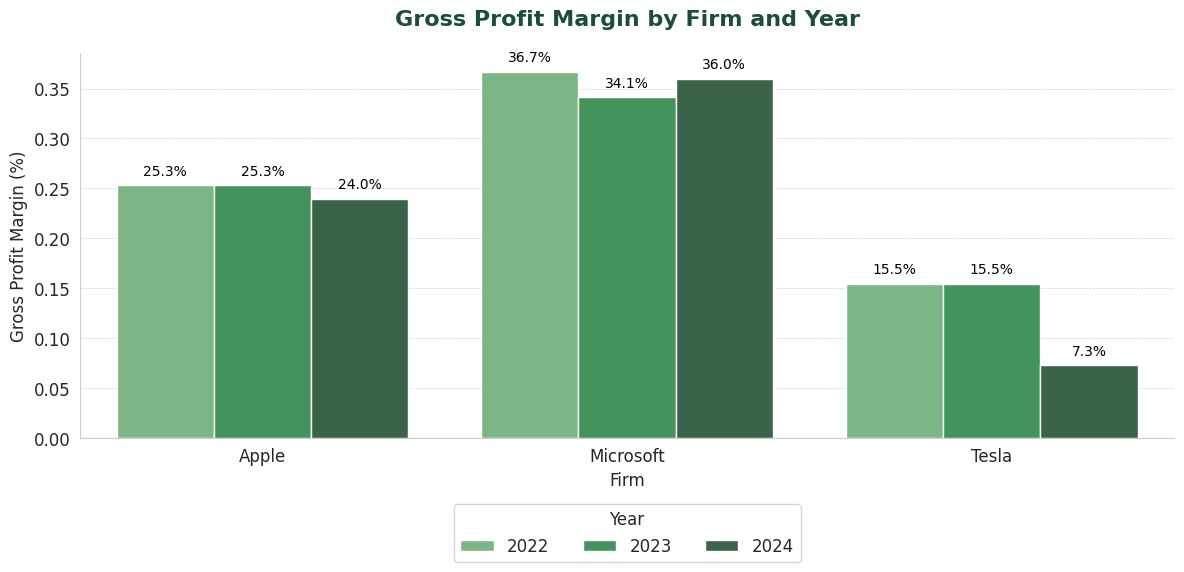

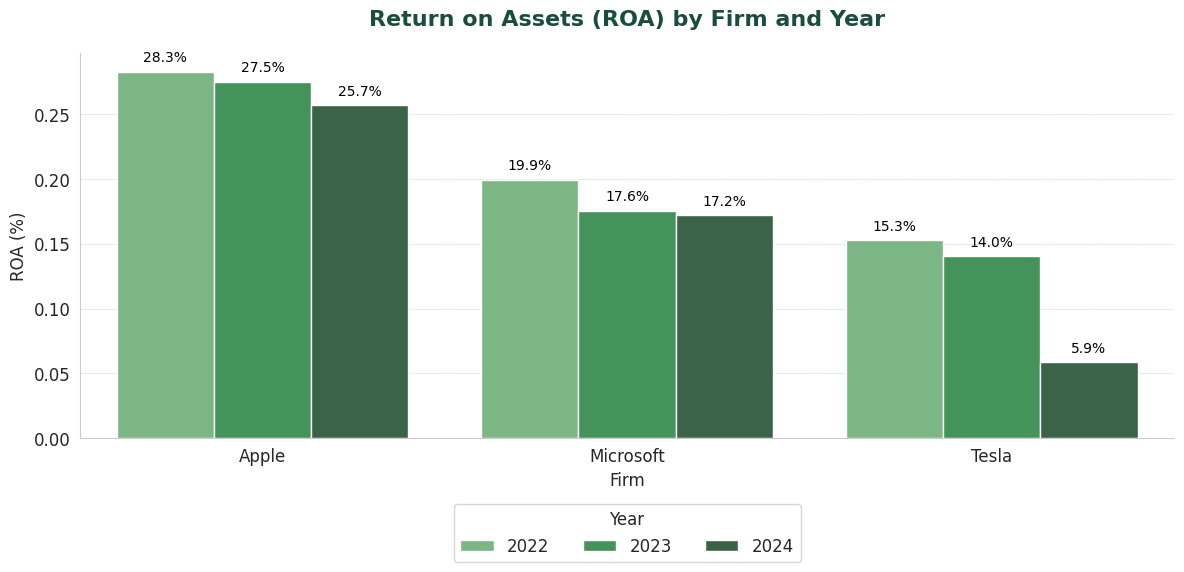

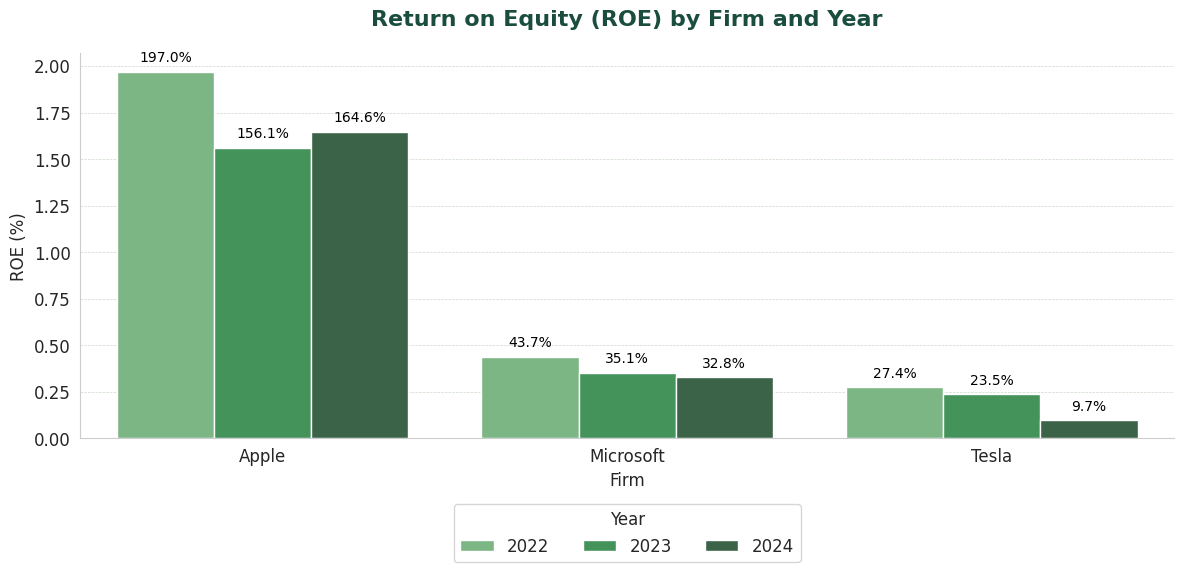

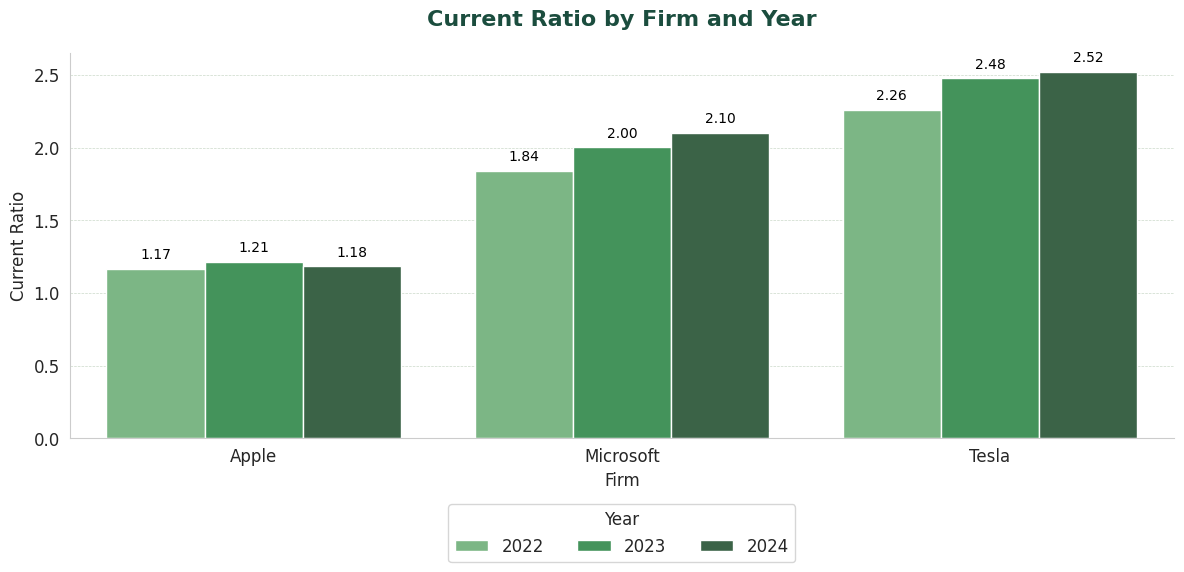

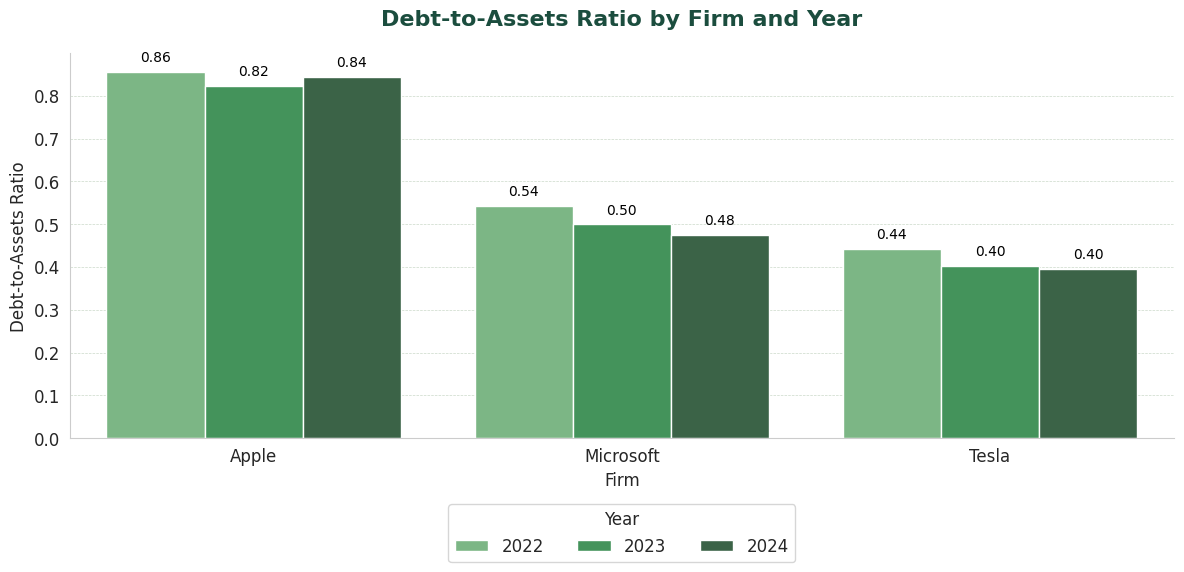

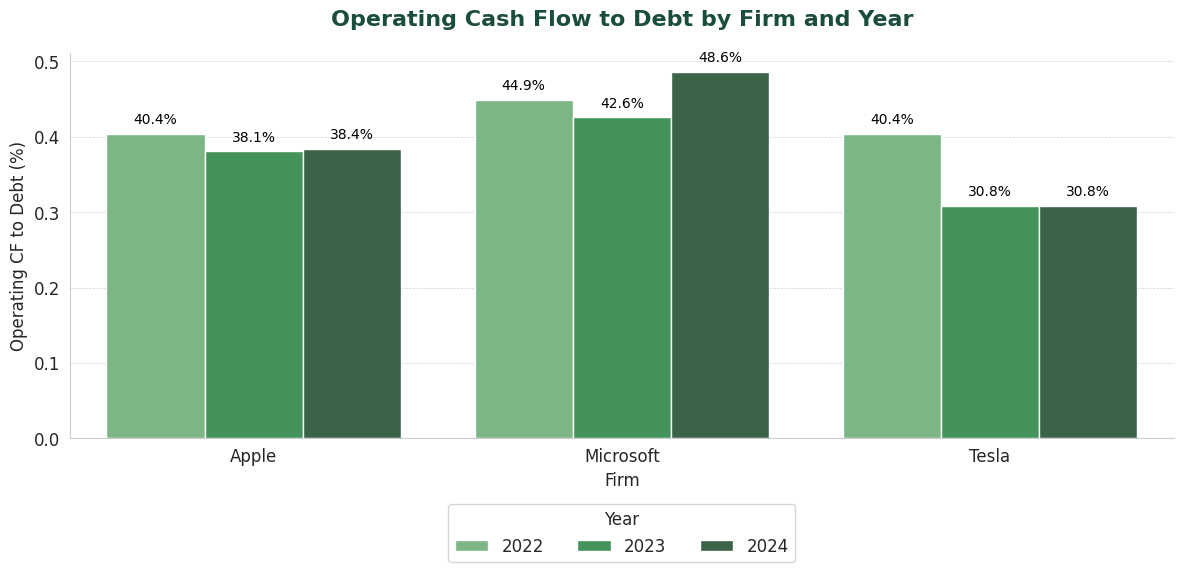

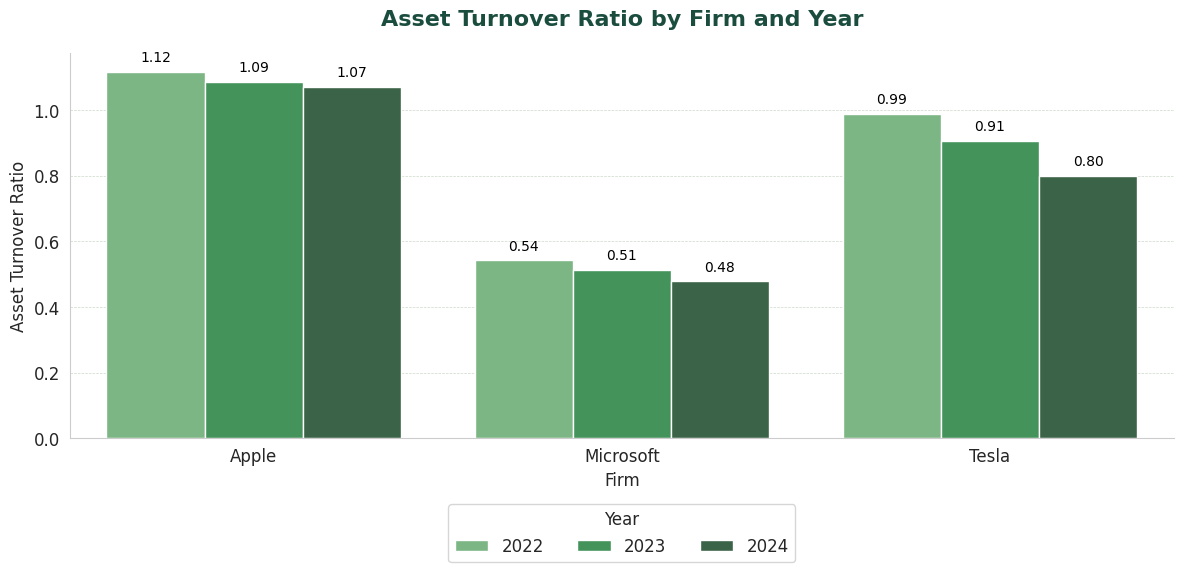

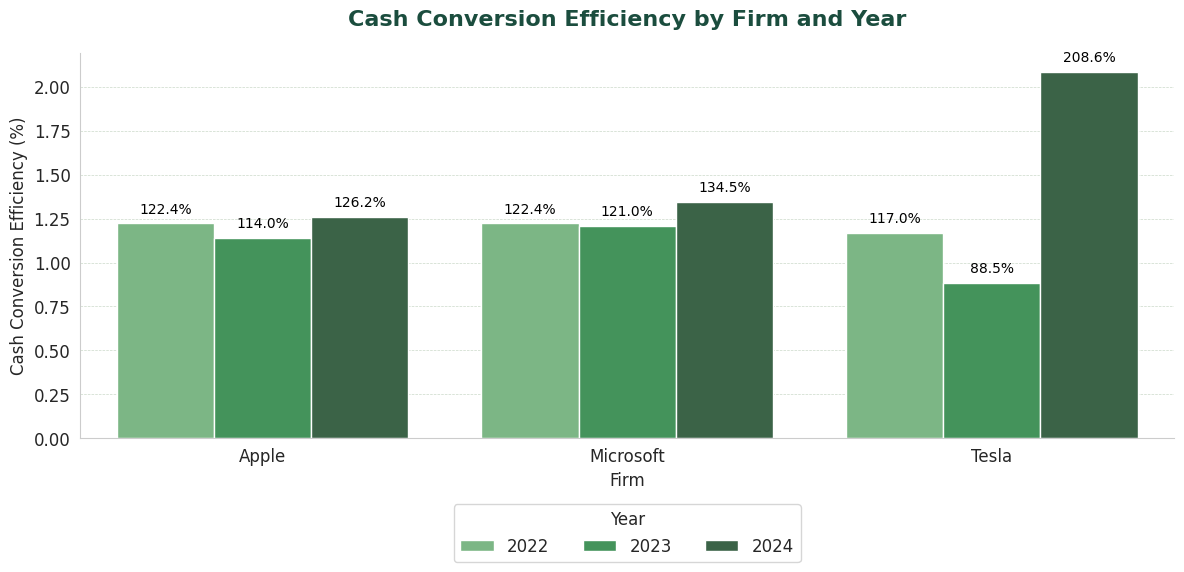

In [ ]:
# Profitability Analysis
plot_metric(df, 'Gross Profit Margin', 'Gross Profit Margin by Firm and Year', percentage = True)
plot_metric(df, 'ROA', 'Return on Assets (ROA) by Firm and Year', percentage = True)
plot_metric(df, 'ROE', 'Return on Equity (ROE) by Firm and Year', percentage = True)

# Liquidity & Solvency Analysis
plot_metric(df, 'Current Ratio', 'Current Ratio by Firm and Year', percentage = False)
plot_metric(df, 'Debt-to-Assets Ratio', 'Debt-to-Assets Ratio by Firm and Year', percentage = False)
plot_metric(df, 'Operating CF to Debt', 'Operating Cash Flow to Debt by Firm and Year', percentage = True)

# Efficiency Analysis
plot_metric(df, 'Asset Turnover Ratio', 'Asset Turnover Ratio by Firm and Year', percentage = False)
plot_metric(df, 'Cash Conversion Efficiency', 'Cash Conversion Efficiency by Firm and Year', percentage = True)

### Analysis

The financial trends across Apple, Microsoft, and Tesla over 2022–2024 reveal key insights into their operational efficiency, profitability, and financial stability. Microsoft maintains the highest gross profit margin, but it fluctuates, dropping from 36.7% in 2022 to 34.1% in 2023 before rebounding to 36% in 2024. Apple’s margin remains relatively stable at around 24–25%, indicating steady pricing power and cost management. Tesla, however, sees a significant decline from 15.5% in 2022 and 2023 to just 7.3% in 2024, suggesting cost pressures, lower pricing power, or increased production expenses. Return on assets follows a similar downward trajectory across all three firms, with Tesla experiencing the sharpest drop from 15.3% to 5.9%, reflecting declining efficiency in converting assets into profit. Apple and Microsoft also decline, with Apple falling from 28.3% to 25.7% and Microsoft from 19.9% to 17.2%, likely due to higher capital investments and a changing macroeconomic environment.

Return on equity paints an even clearer picture of shifting financial efficiency. Apple’s ROE remains exceptionally high but declines from 197% in 2022 to 156.1% in 2023 before rebounding slightly to 164.6%. This suggests continued shareholder value creation, but at a more tempered rate. Microsoft follows a more modest decline from 43.7% to 32.8%, while Tesla plummets from 27.4% to just 9.7%, aligning with its shrinking profitability and margin pressures. The current ratio, which indicates liquidity strength, remains relatively stable for Apple and Microsoft but rises for Tesla from 2.26 to 2.52, suggesting increased short-term assets relative to liabilities, possibly as a precaution against its declining financial position.

Debt-to-assets ratios show little volatility, with Apple maintaining a high leverage level at around 84%, while Microsoft and Tesla remain significantly lower, with Tesla stabilizing at 0.4%. Operating cash flow to debt trends highlight Microsoft’s financial strength, improving from 44.9% to 48.6%, while Apple remains steady around 38–40%. Tesla, however, sees a worrying decline from 40.4% in 2022 to 30.8% in 2023 and 2024, reinforcing concerns about its cash flow management. Asset turnover ratios decline across all three companies, with Apple moving from 1.12 to 1.07, Microsoft from 0.54 to 0.48, and Tesla from 0.99 to 0.8, indicating a general slowdown in revenue generation efficiency relative to assets.

Finally, cash conversion efficiency highlights Tesla’s volatility, dropping from 117% in 2022 to 88.5% in 2023 before an explosive surge to 208.6% in 2024. Apple and Microsoft remain more stable, with Apple fluctuating between 122.4% and 126.2% and Microsoft steadily increasing from 121% to 134.5%. This suggests Tesla is experiencing sharp swings in its ability to turn revenue into free cash flow, while Apple and Microsoft maintain more predictable cash flow efficiency. Overall, Microsoft remains the most balanced performer, Apple retains strong profitability but with a more conservative trajectory, and Tesla faces the most financial turbulence, requiring strategic realignment to regain stability.

# **GFC AI-Powered Financial Chatbot**  

## **Overview**  
The GFC AI-Powered Financial Chatbot transforms raw financial data into interactive, insightful conversations. By structuring data efficiently and applying rule-based logic, it delivers instant, accurate financial insights, improving decision-making and user experience.  

## **Core Functionality**  
The chatbot leverages a predefined query-response system, ensuring consistency and reliability in financial data retrieval. Users select a firm and year, then choose from a set of predefined financial questions, receiving structured responses mapped to key financial metrics. The system maintains context throughout the interaction, minimizing redundant inputs.  

## **Data Structuring & Retrieval**  
Financial data is preprocessed and stored in a nested dictionary format, allowing instant lookups rather than repetitive filtering. This enhances speed and scalability. Key financial metrics include:  
- **Total Revenue**  
- **Net Income**  
- **Revenue Growth (%)**  
- **Gross Profit Margin**  
- **Debt-to-Assets Ratio**  
- **Cash Conversion Efficiency**  

## **Error Handling & User Guidance**  
The chatbot is designed to handle invalid inputs, missing data, and unrecognized queries with clear, structured responses. Users receive guidance on refining their queries, ensuring a smooth interaction and eliminating ambiguity.  

## **Business Impact**  
This chatbot enables faster, more informed financial decision-making by automating data retrieval and simplifying complex insights. It reduces manual analysis time, enhances accessibility for non-experts, and provides a scalable foundation for future AI-driven enhancements, including machine learning integration, real-time financial data updates, and advanced data visualization.

In [ ]:
import pandas as pd
import difflib
import os

file_path = 'BCGX Forage/data/BCGX - Financial Data.csv1'

# Load Data Once
if os.path.exists(file_path):
    print("File found! Loading data...")
    data = pd.read_csv(file_path)
else:
    print(f"Error: File '{file_path}' not found. Please check the path.")

# Convert Data to Dictionary for Fast Lookups
data_dict = {}
for _, row in data.iterrows():
    firm = row['firm']
    year = row['year']

    if firm not in data_dict:
        data_dict[firm] = {}

    data_dict[firm][year] = {
        "Total Revenue": row.get("Total Revenue", "N/A"),
        "Net Income": row.get("Net Income", "N/A"),
        "Revenue Growth (%)": row.get("Revenue Growth (%)", "N/A"),
        "Gross Profit Margin": row.get("Gross Profit Margin", "N/A"),
        "Debt-to-Assets Ratio": row.get("Debt-to-Assets Ratio", "N/A"),
        "Cash Conversion Efficiency": row.get("Cash Conversion Efficiency", "N/A")
    }

# Predefined Questions
questions = {
    1: "What is the total revenue for [year]?",
    2: "What is the net income for [year]?",
    3: "How has revenue changed compared to the previous year?",
    4: "What is the company's gross profit margin for [year]?",
    5: "What is the company's debt-to-assets ratio for [year]?",
    6: "What is the company's cash conversion efficiency for [year]?"
}

def get_closest_match(user_input, choices):
    """Returns the closest match from choices based on user input."""
    closest = difflib.get_close_matches(user_input, choices, n=1, cutoff=0.6)
    return closest[0] if closest else None

def chatbot():
    while True:
        # Step 1: Select Firm
        print("\nAvailable firms:")
        firms = list(data_dict.keys())
        for idx, firm in enumerate(firms, 1):
            print(f"{idx}. {firm}")

        user_firm = input("\nEnter firm name or number: ").strip()

        # Handle input as number or name
        if user_firm.isdigit():
            user_firm = int(user_firm)
            if 1 <= user_firm <= len(firms):
                selected_firm = firms[user_firm - 1]
            else:
                print("Invalid selection. Please try again.")
                continue
        else:
            selected_firm = get_closest_match(user_firm, firms)
            if not selected_firm:
                print("Firm not found. Please try again.")
                continue

        # Step 2: Select Year
        firm_years = list(data_dict[selected_firm].keys())
        print("\nAvailable years:", ", ".join(map(str, firm_years)))

        try:
            year_choice = int(input("Enter year: "))
            if year_choice not in firm_years:
                print("Invalid year. Please try again.")
                continue
        except ValueError:
            print("Invalid input. Please enter a valid year.")
            continue

        # Step 3: Select Question
        print("\nAvailable questions:")
        for num, question in questions.items():
            print(f"{num}. {question.replace('[year]', str(year_choice))}")

        try:
            query_choice = int(input("Enter question number: "))
            if query_choice not in questions:
                print("Invalid selection. Please try again.")
                continue
        except ValueError:
            print("Invalid input. Please enter a number.")
            continue

        # Step 4: Retrieve Data
        firm_data = data_dict[selected_firm][year_choice]
        answer = "Data not available."

        if query_choice == 1:
            answer = f"Total revenue for {selected_firm} in {year_choice}: ${firm_data['Total Revenue']:,.2f}" if firm_data["Total Revenue"] != "N/A" else "Revenue data unavailable."
        elif query_choice == 2:
            answer = f"Net income for {selected_firm} in {year_choice}: ${firm_data['Net Income']:,.2f}" if firm_data["Net Income"] != "N/A" else "Net income data unavailable."
        elif query_choice == 3:
            answer = f"Revenue growth for {selected_firm} in {year_choice}: {firm_data['Revenue Growth (%)']:.2f}%" if firm_data["Revenue Growth (%)"] != "N/A" else "Revenue growth data unavailable."
        elif query_choice == 4:
            answer = f"Gross profit margin for {selected_firm} in {year_choice}: {firm_data['Gross Profit Margin']:.4f}" if firm_data["Gross Profit Margin"] != "N/A" else "Gross profit margin data unavailable."
        elif query_choice == 5:
            answer = f"Debt-to-assets ratio for {selected_firm} in {year_choice}: {firm_data['Debt-to-Assets Ratio']:.4f}" if firm_data["Debt-to-Assets Ratio"] != "N/A" else "Debt-to-assets ratio data unavailable."
        elif query_choice == 6:
            answer = f"Cash conversion efficiency for {selected_firm} in {year_choice}: {firm_data['Cash Conversion Efficiency']:.4f}" if firm_data["Cash Conversion Efficiency"] != "N/A" else "Cash conversion efficiency data unavailable."

        print("\n" + answer)

        # Ask if user wants another query
        again = input("\nWould you like to ask another question? (yes/no): ").strip().lower()
        if again != 'yes':
            print("Goodbye!")
            break

## Make it a .py
# if __name__ == "__main__":
#     chatbot()